In [10]:
# librerias
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Parte 1: Preparación de Datos (15 puntos)

1.1 Cargue los datos en un DataFrame de Pandas

In [11]:
df = pd.read_csv('UK_foods.csv')
df.rename(columns={'Unnamed: 0': 'Food'}, inplace=True)
df.head()

,Food,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


1.2 Realice una exploración básica de los datos (estadísticas descriptivas).

In [12]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title='Food', explorative=True)
# profile

In [13]:
from sklearn.preprocessing import MinMaxScaler
foods = df['Food']
data = df.drop('Food', axis=1)

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data_scaled  = pd.DataFrame(data, columns=df.columns[1:])
data_scaled .head()

,England,Wales,Scotland,N.Ireland
0,0.035966,0.025692,0.032916,0.017065
1,0.134697,0.107378,0.124424,0.154266
2,0.444993,0.486825,0.458855,0.372014
3,0.065585,0.063241,0.045425,0.035495
4,0.098025,0.112648,0.086241,0.114676


# Parte 2: Construcción del Autocodificador

2.1 Dada la pequeña cantidad de datos, utilice todas las observaciones para entrenar el modelo.

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definir el autocodificador
input_dim = data_scaled.shape[1]  # Número de países
encoding_dim = 2  # Cuello de botella de 2 dimensiones

# Capa de entrada
input_layer = layers.Input(shape=(input_dim,))

# Codificador
encoded = layers.Dense(10, activation='relu')(input_layer)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decodificador
decoded = layers.Dense(10, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Modelo autocodificador
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Resumen del modelo
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_4 (Dense)             (None, 10)                50        
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 4)                 44        
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Entrenar el autocodificador
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=4, shuffle=True)

Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1456
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1448
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1443
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1437
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1431
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1426
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1420
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1414
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1409
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1404
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1399
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1394
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.

In [16]:
loss = autoencoder.evaluate(data_scaled, data_scaled)
print(f'Pérdida de reconstrucción: {loss}')

1/1 [==============================] - 0s 138ms/step - loss: 0.1136
Pérdida de reconstrucción: 0.1136169508099556


# Parte 3: Reducción de Dimensionalidad y Visualización

In [17]:
# Crear un modelo para obtener solo la parte codificada
encoder = models.Model(input_layer, encoded)
reduced_data = encoder.predict(data_scaled)

1/1 [==============================] - 0s 58ms/step


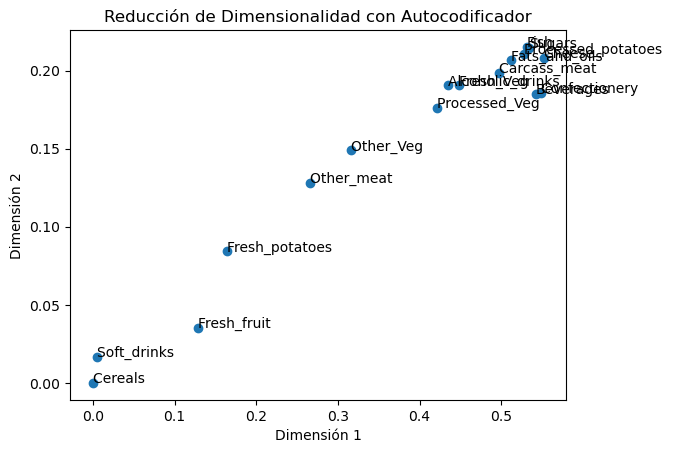

In [18]:
import matplotlib.pyplot as plt

plt.scatter(reduced_data[:, 0], reduced_data[:, 1])

# Añadir etiquetas para los tipos de alimentos
for i, food in enumerate(foods):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], food)

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Reducción de Dimensionalidad con Autocodificador')
plt.show()

3.3 Interpretación de las dimensiones latentes

Las dimensiones resultantes del proceso de re-dimensionamiento no tienen un significado específico. Sin embargo, es posible extraer información de las mismas. Para ello, se puede analizar los pesos de las conexiones entre las neuronas de la capa de entrada y la capa oculta. Estos pesos indican la importancia de cada variable en la dimensión latente. Por ejemplo, si la primera dimensión latente tiene un peso alto en la variable 1, esto indica que la variable 1 es importante para la dimensión latente 1.

Así mismo y en un primer vistazo, se puede analizar que los puntos que están cercanos tienen patrones de consumo similares.


# Parte 4: Discusión y percepciones nuevas "Insights"

### Interpretación de patrones de consumo:
La reducción dimensional con el autocodificador revela patrones claros en el consumo de alimentos. Se observa que ciertos grupos de alimentos, como los procesados ("Processed_Veg" y "Alcoholic_drinks"), tienden a agruparse, lo que indica similitudes en sus patrones de consumo. Por otro lado, alimentos como "Soft_drinks" y "Cereals" están distanciados del resto, lo que sugiere patrones de consumo distintos, posiblemente influenciados por diferencias culturales o económicas. La distribución en el gráfico muestra que los alimentos frescos, como "Fresh_fruit" y "Fresh_potatoes", también tienen patrones diferenciados de otros vegetales y carnes. 

### Evaluación de rendimiento del modelo:
El autocodificador ha demostrado ser eficaz en la tarea de reducción dimensional, con una pérdida de reconstrucción de 0.1136. Este valor indica que el modelo ha logrado captar las características clave de los datos sin un gran error en la reconstrucción. Aunque no es un valor extremadamente bajo, es suficiente para considerar que el modelo ha aprendido de manera efectiva los patrones subyacentes. La arquitectura con un cuello de botella de dos dimensiones ha sido adecuada para reducir los datos de forma compacta y aún así mantener las relaciones importantes entre los tipos de alimentos. El modelo ha sido capaz de representar la complejidad de los datos originales de manera que permite visualizarlos y analizarlos, lo que muestra un buen rendimiento en cuanto a su capacidad para comprimir información de manera eficiente.
